In [1]:
import pandas as pd
import numpy
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import sklearn.utils
from sklearn.model_selection import StratifiedGroupKFold

In [2]:
df = pd.read_csv('./bace_extend.csv')


In [3]:
df

,Unnamed: 0,index,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,InchiKey
0,0,QMSHBBGXSXAGOO-XMSQKQJNSA-N,0.135264,0.226934,-0.073585,-0.035248,-0.196601,0.042196,-0.466781,-0.186542,...,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1,QMSHBBGXSXAGOO-XMSQKQJNSA-N
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2,LPZOLMFQGUDKQH-ZXWXCOCLSA-O
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3,MNGUVHPNHVMEDL-MFMCTBQISA-O
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4,UJZFSYZNJMWXJO-NJONLQHESA-O
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5,MSHYGGHZTGSTOG-LMSSTIIKSA-O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543,MGDIYBDWQLFUQN-UHFFFAOYSA-N
1509,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544,VNUVPFZMZYGABL-UHFFFAOYSA-N
1510,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545,FNZZUITVFBKILF-UHFFFAOYSA-N
1511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546,IPEYSHXKDLIENI-UHFFFAOYSA-N


In [5]:
from signaturizer import Signaturizer
# sign = Signaturizer('A1')
import numpy as np
np.bool = np.bool_


2023-09-29 16:08:56.560783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 16:08:57.680512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
impute_layers=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5",
               "C1","C2","C3","C4","C5","D1","D2","D3","D4","D5",
               "E1","E2","E3","E4","E5"]
data_all=np.empty([df.shape[0],0])
for layer in impute_layers:
    print(layer)
    sign = Signaturizer(layer)
    data_tmp = sign.predict(df["smiles"])
    data_tmp_sig=data_tmp.signature
    data_all=np.concatenate([data_all,data_tmp_sig], axis=1)
    # convert array into dataframe
    DF = pd.DataFrame(data_all, index=df["smiles"])
 
    # save the dataframe as a csv file
    DF.to_csv("extend_dataset/BACE/SNN_imputed_BACE_25layers_v2.csv")
#                         Tox21_B2.signature,Tox21_B3.signature,
#                         Tox21_B4.signature,Tox21_B5.signature,
#                        Tox21_C1.signature,Tox21_C2.signature,Tox21_C3.signature,Tox21_C4.signature,Tox21_C5.signature,
#                        Tox21_D1.signature,Tox21_D2.signature,Tox21_D3.signature,Tox21_D4.signature,Tox21_D5.signature,
#                        Tox21_E1.signature,Tox21_E2.signature,Tox21_E3.signature,Tox21_E5.signature], axis=1)


A1


Parsing SMILES: 1513it [00:00, 4814.57it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


2023-09-29 16:09:27.152108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Generating signatures:   8%|█▊                   | 1/12 [00:01<00:12,  1.16s/it]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:01<00:05,  1.69it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:01<00:03,  2.41it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:01<00:02,  3.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  3.57it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:02<00:01,  3.98it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:02<00:01,  4.30it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:02<00:00,  4.50it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.70it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.85it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:03<00:00,  4.93it/s]

1/1 [==============================] - 0s 46ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:03<00:00,  3.57it/s]


A2


Parsing SMILES: 1513it [00:00, 4867.15it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 45ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.88it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.56it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.76it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.87it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  3.51it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  3.87it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.15it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  4.42it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.62it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.77it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.75it/s]

1/1 [==============================] - 0s 47ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.42it/s]


A3


Parsing SMILES: 1513it [00:00, 4878.11it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.98it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.59it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.77it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.84it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.95it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.99it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.03it/s]

1/1 [==============================] - 0s 24ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  4.96it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.33it/s]

1/1 [==============================] - 0s 46ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.57it/s]


A4


Parsing SMILES: 1513it [00:00, 4858.23it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.98it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.75it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.85it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.87it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.06it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.85it/s]


A5


Parsing SMILES: 1513it [00:00, 4879.90it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.63it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.08it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.05it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.90it/s]


B1


Parsing SMILES: 1513it [00:00, 4885.08it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.62it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.82it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.88it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.97it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.09it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.08it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.92it/s]


B2


Parsing SMILES: 1513it [00:00, 4912.28it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.61it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.79it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.90it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.99it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.10it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.11it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.13it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.92it/s]


B3


Parsing SMILES: 1513it [00:00, 4974.38it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.64it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.82it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.97it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.10it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.12it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.13it/s]

1/1 [==============================] - 0s 46ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.93it/s]


B4


Parsing SMILES: 1513it [00:00, 4796.30it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.61it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.79it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.86it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.95it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.09it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.92it/s]


B5


Parsing SMILES: 1513it [00:00, 4913.73it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.61it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.97it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.99it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.90it/s]


C1


Parsing SMILES: 1513it [00:00, 4889.77it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.61it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.77it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.88it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.96it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.02it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.03it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.05it/s]

1/1 [==============================] - 0s 46ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.88it/s]


C2


Parsing SMILES: 1513it [00:00, 4898.78it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.62it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.87it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.95it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.91it/s]


C3


Parsing SMILES: 1513it [00:00, 4901.74it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.99it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.76it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.89it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 31ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.90it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.07it/s]

1/1 [==============================] - 0s 48ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.86it/s]


C4


Parsing SMILES: 1513it [00:00, 4869.96it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.99it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.61it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  3.84it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.19it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  4.46it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  4.65it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.80it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.86it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.59it/s]


C5


Parsing SMILES: 1513it [00:00, 4875.54it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.63it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.81it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.99it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.10it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.90it/s]


D1


Parsing SMILES: 1513it [00:00, 4823.65it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.58it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.02it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  5.00it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.09it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.11it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.90it/s]


D2


Parsing SMILES: 1513it [00:00, 4840.95it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.63it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.81it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.92it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.94it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  3.42it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:01,  3.83it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.16it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.40it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.61it/s]

1/1 [==============================] - 0s 47ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.40it/s]


D3


Parsing SMILES: 1513it [00:00, 4768.35it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.03it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.63it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.79it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.85it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.96it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.08it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.04it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.08it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.90it/s]


D4


Parsing SMILES: 1513it [00:00, 4897.15it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.67it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.78it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.98it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.03it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.06it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  3.73it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.08it/s]

1/1 [==============================] - 0s 46ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.49it/s]


D5


Parsing SMILES: 1513it [00:00, 4905.05it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.98it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:04,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:01<00:03,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  33%|███████              | 4/12 [00:01<00:02,  3.30it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  3.72it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.04it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.25it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:02<00:00,  4.44it/s]

1/1 [==============================] - 0s 22ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.56it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.66it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.73it/s]

1/1 [==============================] - 0s 56ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:03<00:00,  3.96it/s]


E1


Parsing SMILES: 1513it [00:00, 4811.20it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:03,  2.64it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:02,  3.36it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:01<00:02,  3.89it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.24it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  4.50it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.70it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  4.84it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.92it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.95it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.01it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.42it/s]


E2


Parsing SMILES: 1513it [00:00, 4830.53it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.64it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.78it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.91it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  4.96it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.05it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.08it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.14it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.13it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.13it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.93it/s]


E3


Parsing SMILES: 1513it [00:00, 4867.29it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  3.99it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.60it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.78it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  5.00it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.02it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.08it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.12it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.13it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  5.15it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  5.11it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.94it/s]


E4


Parsing SMILES: 1513it [00:00, 4895.03it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.05it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.63it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:02,  3.39it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  3.84it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:01,  4.20it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  4.47it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:02<00:00,  4.66it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:02<00:00,  4.73it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  4.86it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.45it/s]


E5


Parsing SMILES: 1513it [00:00, 4798.21it/s]
Generating signatures:   0%|                             | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


Generating signatures:   8%|█▊                   | 1/12 [00:00<00:02,  4.04it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  17%|███▌                 | 2/12 [00:00<00:02,  4.62it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  25%|█████▎               | 3/12 [00:00<00:01,  4.79it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████              | 4/12 [00:00<00:01,  4.94it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  42%|████████▊            | 5/12 [00:01<00:01,  5.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  50%|██████████▌          | 6/12 [00:01<00:01,  5.08it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  58%|████████████▎        | 7/12 [00:01<00:00,  5.11it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████       | 8/12 [00:01<00:00,  5.13it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  75%|███████████████▊     | 9/12 [00:01<00:00,  5.17it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  83%|████████████████▋   | 10/12 [00:01<00:00,  5.20it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  92%|██████████████████▎ | 11/12 [00:02<00:00,  3.83it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|████████████████████| 12/12 [00:02<00:00,  4.55it/s]


In [4]:

mol_list = []
for smi in df.smiles:
    mol_list.append(Chem.MolFromSmiles(smi))

scaffolds = {}
clusters_list =[]

idx = 1

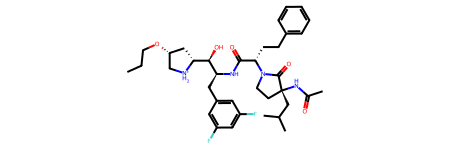

In [5]:
mol_list[1]

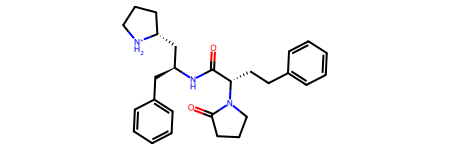

In [6]:
MurckoScaffold.GetScaffoldForMol(mol_list[1])

In [7]:

for mol in mol_list:
    print(mol)
    scaffold_smi =  MurckoScaffold.GetScaffoldForMol(mol)
    if scaffold_smi not in scaffolds.keys():
        scaffolds[scaffold_smi] = idx
        idx+=1
       
    cluster_id = scaffolds[scaffold_smi]
    clusters_list.append(cluster_id)
   



In [8]:
df['Group'] = clusters_list
df = sklearn.utils.shuffle(df,random_state=42).reset_index(drop=True)

df.to_csv('./extend_dataset//BACE/BACE_extend_group.csv',index=False)

In [9]:
df_not_na=df[df["A1.0"].isna()]

In [10]:

from signaturizer import Signaturizer
sign = Signaturizer('A1')
import numpy as np
np.bool = np.bool_

2023-10-03 08:40:47.454693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 08:40:48.551011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-03 08:40:51.665274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38400 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-03 08:40:51.666362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1201 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0


In [11]:
not_na_A1 = sign.predict(df_not_na["smiles"])
# df_not_na_A1
df_not_na_A1_np=not_na_A1.signature

Parsing SMILES: 1070it [00:00, 4596.18it/s]
Generating signatures:   0%|                              | 0/9 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


2023-10-03 08:40:53.843432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Generating signatures:  11%|██▍                   | 1/9 [00:00<00:06,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  22%|████▉                 | 2/9 [00:01<00:03,  2.16it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  33%|███████▎              | 3/9 [00:01<00:02,  2.39it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  44%|█████████▊            | 4/9 [00:01<00:01,  3.03it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  56%|████████████▏         | 5/9 [00:01<00:01,  3.56it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  67%|██████████████▋       | 6/9 [00:01<00:00,  3.97it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  78%|█████████████████     | 7/9 [00:02<00:00,  4.27it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  89%|███████████████████▌  | 8/9 [00:02<00:00,  4.52it/s]

1/1 [==============================] - 0s 45ms/step


Generating signatures: 100%|██████████████████████| 9/9 [00:02<00:00,  3.50it/s]


In [12]:
df_na=pd.DataFrame(df_not_na_A1_np, columns=list(df.columns)[2:130])

In [13]:
df_na_index_in_df=df_not_na["smiles"].reset_index()

In [14]:
df_na

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,A1.118,A1.119,A1.120,A1.121,A1.122,A1.123,A1.124,A1.125,A1.126,A1.127
0,-0.099887,-0.097642,0.026768,0.098269,0.099371,-0.086897,-0.100228,0.096082,0.095514,0.054126,...,0.096757,0.075789,0.070837,0.050728,-0.096364,0.100728,0.099716,-0.100857,-0.100690,0.099909
1,-0.105383,-0.084101,0.052773,-0.123670,0.103895,-0.014731,0.118689,0.115205,-0.088573,-0.065634,...,-0.115907,-0.058365,0.105241,-0.012309,-0.075125,0.022373,-0.123647,-0.125194,0.081191,0.038855
2,-0.091990,-0.110316,-0.023080,-0.112492,0.113574,-0.036468,0.086817,0.100114,-0.103937,-0.056662,...,-0.112882,-0.002903,0.106242,-0.099487,-0.111485,0.053613,-0.112598,-0.113680,0.108079,-0.022755
3,-0.106322,-0.068659,0.106459,-0.109608,0.083164,0.092329,0.106427,0.106893,-0.107063,0.003035,...,-0.108455,0.038020,0.108999,0.058655,-0.087312,-0.017664,-0.109398,-0.109353,0.009519,0.018627
4,-0.058708,-0.091977,0.060769,0.075237,-0.099827,-0.099951,0.010685,0.092245,0.095502,-0.099521,...,0.079706,-0.099218,0.098450,-0.098062,-0.091928,0.083381,-0.099653,-0.099960,-0.099933,0.073365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,-0.109341,-0.121040,0.091249,-0.114857,0.117237,0.113148,-0.095687,0.110024,-0.113257,0.041536,...,-0.033577,0.085901,0.073244,-0.107560,-0.065281,-0.093620,-0.105740,-0.120689,0.081267,0.094320
1066,0.098478,-0.099258,-0.047795,0.093842,-0.099305,-0.097551,-0.051867,-0.022412,0.099293,-0.029188,...,0.081253,-0.027750,0.097326,-0.097766,-0.099265,0.093198,-0.084614,-0.099305,-0.099229,-0.099181
1067,-0.028005,-0.087936,0.083440,-0.020594,-0.101288,-0.101282,0.091784,-0.067068,0.095335,-0.051956,...,0.036696,-0.100990,0.101068,-0.057608,-0.079849,0.059834,-0.101274,-0.101288,-0.101286,-0.090307
1068,0.100691,-0.103253,-0.097933,0.096971,-0.103484,-0.090100,-0.073919,-0.103050,0.103213,0.095358,...,0.098916,-0.088347,0.092435,0.075327,0.048288,0.067911,-0.087543,-0.049646,-0.103455,-0.102097


In [15]:
for i in range(df_na.shape[0]):
    df_na_index=df_na_index_in_df["index"]
    df.iloc[df_na_index,2:130]=df_na.iloc[i,:]



    

In [16]:
df.to_csv('./extend_dataset/BACE/BACE_extend_v2.csv',index=False)

In [17]:
df=pd.read_csv("./extend_dataset/BACE/BACE_extend_v2.csv")

In [43]:
df

,Unnamed: 0,index,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,...,PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,InchiKey,Group
0,0,NaN,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,...,149.280230,58.298748,20.071724,3.556777,7.980170,0.0,0.000000,1034,ZEPLYSGSJFWAKW-UHFFFAOYSA-N,1002
1,0,AVTLPQHFOWVUGZ-XRRIUQSZSA-N,-0.357394,0.233842,-0.039962,-0.320740,0.084283,0.133123,-0.711405,-0.088413,...,106.619260,123.839480,31.029167,3.271739,16.168497,0.0,6.970751,649,AVTLPQHFOWVUGZ-XRRIUQSZSA-N,619
2,0,NaN,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,...,246.840210,133.516510,27.744167,0.000000,15.879790,0.0,24.663788,839,AMVDNFIQANYLEW-UHFFFAOYSA-O,807
3,0,RUUJDLSJAYXIRG-UHFFFAOYSA-N,-0.188393,0.171437,-0.050890,-0.260749,0.209574,0.135822,-0.554064,0.202823,...,69.366081,166.297550,44.097675,3.271739,0.000000,0.0,0.000000,976,RUUJDLSJAYXIRG-UHFFFAOYSA-N,944
4,0,NaN,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,...,389.707400,147.600170,17.478146,0.230159,15.879790,0.0,24.663788,331,WICLUVROROXQTO-UHFFFAOYSA-O,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0,RNJTYVPMRSKRKE-FQEVSTJZSA-N,-0.201738,0.307355,-0.093697,0.060396,0.182834,-0.099924,-0.372073,-0.087622,...,70.946503,101.924600,49.777847,3.271739,7.980170,0.0,4.109308,1163,RNJTYVPMRSKRKE-FQEVSTJZSA-N,1131
1509,0,BMASJJOJXPLURJ-UHFFFAOYSA-N,-0.301355,0.176946,-0.052781,-0.233931,0.033467,-0.127514,-0.600916,-0.214076,...,152.638840,113.462350,20.071724,3.556777,7.980170,0.0,0.000000,1327,BMASJJOJXPLURJ-UHFFFAOYSA-N,1295
1510,0,NaN,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,...,271.814390,117.242150,23.302103,7.980170,8.188327,0.0,24.663788,893,HDLQUIILQOTKOY-UHFFFAOYSA-O,861
1511,0,NaN,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,...,174.523900,83.363235,13.159866,8.300141,7.980170,0.0,33.024784,1493,ZTAKZWLKLGRPRA-UHFFFAOYSA-O,1460


In [44]:
X=df.iloc[:,2:3202]
y=df["Class"]
groups=df['Group']

In [45]:
#########################
# 自定义，按组划分
cv_group = StratifiedGroupKFold(n_splits=10).split(X, y, groups=groups)
for i,(rest_index, test_index) in zip(range(10),cv_group):
        if i==5:
            
            X_rest, y_rest, X_test, y_test = X.iloc[rest_index,], y.iloc[rest_index,], X.iloc[test_index,], y.iloc[test_index,]
            groups_rest, groups_test = groups.iloc[rest_index], groups.iloc[test_index]
            rest = pd.concat([X_rest,y_rest,groups_rest],axis=1)
            test = pd.concat([X_test,y_test,groups_test],axis=1)
    
    
        
    
       
        
        
        
        
# filename_train="extend_dataset/BBBP/BBBP_train_"+str(i)+"over5.csv"
filename_test="extend_dataset/BACE/BACE_test.csv"
# train_index_file="extend_dataset/BBBP/BBBP_train_index_"+str(i)+"over5.csv"
test_index_file="extend_dataset/BACE/BACE_test_index.csv"
        
# train.to_csv(filename_train,index=False)
test.to_csv(filename_test,index=False)
        
# train_index=pd.DataFrame(train_index)
test_index=pd.DataFrame(test_index)
        
        
# train_index.to_csv(train_index_file,index=False)
test_index.to_csv(test_index_file,index=False)
        
        
   


In [46]:
rest

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,E5.120,E5.121,E5.122,E5.123,E5.124,E5.125,E5.126,E5.127,Class,Group
0,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1002
2,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,807
3,-0.188393,0.171437,-0.050890,-0.260749,0.209574,0.135822,-0.554064,0.202823,-0.085376,-0.068773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,944
4,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,304
5,-0.081711,0.258757,-0.179455,-0.281934,0.033873,-0.031206,-0.666788,-0.077440,-0.100860,-0.022434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,-0.201738,0.307355,-0.093697,0.060396,0.182834,-0.099924,-0.372073,-0.087622,0.101105,-0.032623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1131
1509,-0.301355,0.176946,-0.052781,-0.233931,0.033467,-0.127514,-0.600916,-0.214076,-0.081580,-0.058680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1295
1510,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,861
1511,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1460


In [47]:
X_train_val=rest.iloc[:,0:3200]
y_train_val=rest["Class"]
groups_train_val=rest['Group']

In [48]:
X_train_val

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,E5.118,E5.119,E5.120,E5.121,E5.122,E5.123,E5.124,E5.125,E5.126,E5.127
0,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.188393,0.171437,-0.050890,-0.260749,0.209574,0.135822,-0.554064,0.202823,-0.085376,-0.068773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.081711,0.258757,-0.179455,-0.281934,0.033873,-0.031206,-0.666788,-0.077440,-0.100860,-0.022434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,-0.201738,0.307355,-0.093697,0.060396,0.182834,-0.099924,-0.372073,-0.087622,0.101105,-0.032623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,-0.301355,0.176946,-0.052781,-0.233931,0.033467,-0.127514,-0.600916,-0.214076,-0.081580,-0.058680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1510,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cv_group = StratifiedGroupKFold(n_splits=9).split(X_train_val, y_train_val, groups=groups_train_val)
for i,(train_index, valid_index) in zip(range(4),cv_group):

            
        X_train, y_train, X_valid, y_valid = X_train_val.iloc[train_index,], y_train_val.iloc[train_index,], X_train_val.iloc[valid_index,], y_train_val.iloc[valid_index,]
        groups_train, groups_valid = groups_train_val.iloc[train_index], groups_train_val.iloc[valid_index]
        train = pd.concat([X_train,y_train,groups_train],axis=1)
        valid = pd.concat([X_valid,y_valid,groups_valid],axis=1)
            
        filename_train="extend_dataset/BACE/BACE_train_"+str(i+1)+"over4.csv"
        filename_valid="extend_dataset/BACE/BACE_valid_"+str(i+1)+"over4.csv"
        train_index_file="extend_dataset/BACE/BACE_train_index_"+str(i+1)+"over4.csv"
        valid_index_file="extend_dataset/BACE/BACE_valid_index_"+str(i+1)+"over4.csv"
        
        train.to_csv(filename_train,index=False)
        valid.to_csv(filename_valid,index=False)
        
        train_index=pd.DataFrame(train_index)
        valid_index=pd.DataFrame(valid_index)
        
        
        train_index.to_csv(train_index_file,index=False)
        valid_index.to_csv(valid_index_file,index=False)

In [50]:
train

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,E5.120,E5.121,E5.122,E5.123,E5.124,E5.125,E5.126,E5.127,Class,Group
0,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1002
2,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,807
4,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,304
5,-0.081711,0.258757,-0.179455,-0.281934,0.033873,-0.031206,-0.666788,-0.077440,-0.100860,-0.022434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1231
8,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-0.082015,0.554362,-0.368304,-0.210076,0.053878,-0.217577,-0.577924,-0.293196,-0.112478,-0.521616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1096
1508,-0.201738,0.307355,-0.093697,0.060396,0.182834,-0.099924,-0.372073,-0.087622,0.101105,-0.032623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1131
1510,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,861
1511,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1460


In [51]:
valid

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,E5.120,E5.121,E5.122,E5.123,E5.124,E5.125,E5.126,E5.127,Class,Group
3,-0.188393,0.171437,-0.050890,-0.260749,0.209574,0.135822,-0.554064,0.202823,-0.085376,-0.068773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,944
7,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,343
26,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,463
29,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1484
49,-0.155929,0.288714,-0.169346,-0.164471,0.086029,-0.130630,-0.448230,-0.022381,-0.026863,-0.224100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,563
1471,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1474
1482,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,253
1498,-0.199091,0.082987,-0.025064,-0.072913,0.090581,0.165142,-0.709387,-0.053813,-0.099465,-0.232290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1124


In [52]:
test

,A1.0,A1.1,A1.2,A1.3,A1.4,A1.5,A1.6,A1.7,A1.8,A1.9,...,E5.120,E5.121,E5.122,E5.123,E5.124,E5.125,E5.126,E5.127,Class,Group
1,-0.357394,0.233842,-0.039962,-0.320740,0.084283,0.133123,-0.711405,-0.088413,-0.038658,-0.277579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,619
6,-0.025850,-0.079531,-0.183058,-0.138238,0.206863,-0.090294,-0.389763,-0.088475,-0.092399,-0.176935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,176
13,-0.222103,0.228979,-0.105385,-0.155759,0.076687,-0.017499,-0.532614,-0.265836,0.015679,-0.324867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,568
24,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,429
28,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,996
1442,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1026
1461,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,388
1480,-0.074167,-0.100764,0.098425,-0.109830,0.081148,0.104023,0.099931,0.090601,-0.107588,-0.078290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,857


TypeError: 'generator' object is not subscriptable